*****<h3 style="color:purple">Building a Classifier for the Iris Dataset</h3>*****

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [98]:
iriss=load_iris()
dir(iriss)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

***iris.data***

In the sklearn.datasets.load_iris() function, the data attribute contains the feature data for the samples in the iris dataset.

The iris dataset is a collection of measurements taken from samples of three different species of iris flowers. The data attribute is a two-dimensional array, where each row represents a single sample, and each column represents a different feature. There are four features in the iris dataset, representing the sepal length, sepal width, petal length, and petal width of each iris flower.

For example, iris.data[0] would return an array of the four feature values for the first sample in the iris dataset. If the first sample had a sepal length of 5.1 cm, a sepal width of 3.5 cm, a petal length of 1.4 cm, and a petal width of 0.2 cm, then iris.data[0] would return the array [5.1, 3.5, 1.4, 0.2].

We can use the data attribute to train a machine learning model to predict the class of iris flower based on its features.

In [99]:
iriss.data[0]

array([5.1, 3.5, 1.4, 0.2])

**iris.target**

In the iris dataset, the samples are ordered such that the first 50 samples correspond to Iris Setosa, the next 50 samples correspond to Iris Versicolour, and the last 50 samples correspond to Iris Virginica.

Therefore, if iris.target[0] returns the value 0, it means that the first sample in the dataset is an Iris Setosa flower. If iris.target[0] returns the value 1, it means that the first sample in the dataset is an Iris Versicolour flower. If iris.target[0] returns the value 2, it means that the first sample in the dataset is an Iris Virginica flower.

In [100]:
iriss.target[100]

2

***<span style="color:purple">1-Logistic Regression</span>***

In [101]:
from sklearn.linear_model import LogisticRegression
loreg=LogisticRegression()
from sklearn.model_selection import train_test_split

**train-test-split**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iriss.data, iriss.target, test_size=0.3, stratify=iriss.target)

In [103]:
loreg.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
loreg.score(X_test,y_test)

0.9555555555555556

In [105]:
loreg.predict(iriss.data[50:99])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [106]:
y_predicted=loreg.predict(X_test)

***<span style="color:red">Confusion Matrix</span>***

A confusion matrix is a table used to evaluate the performance of a machine learning model. It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes (also known as ground truth) in a classification problem

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

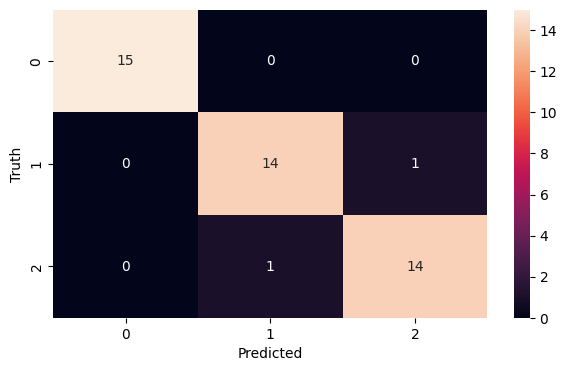

In [108]:
import seaborn as sn
plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

***<span style="color:purple">2-Random Forest</span>***

Random Forest is a popular ensemble learning technique used in machine learning to improve the accuracy of decision trees. It is a supervised learning algorithm that works by creating multiple decision trees and combining their results to make a final prediction.

In Random Forest, each decision tree is trained on a randomly selected subset of the original dataset and a random subset of the features. This process of selecting random subsets of data and features is known as "bagging" and helps to reduce the risk of overfitting.

During prediction, the output of each decision tree is averaged to produce the final prediction. This ensemble approach helps to improve the accuracy of the model by reducing the variance and bias of the individual decision trees.

In [118]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=20,criterion="gini")

<h6>In random forest, "n_entropy" and "criterion" are parameters used to determine how the decision trees are constructed.</h6
<ol>
<li><h4 style="color:red">"n_entropy"</h4> is the number of trees that should be included in the forest. A higher value will increase the diversity of the trees in the forest, which can improve the accuracy of the model but also increase the computation time.</li>

<li><h4 style="color:red">"criterion"</h4> is the function used to measure the quality of each split in the decision trees. The two most common criteria used are "gini" and "entropy". "Gini" measures the impurity of the node, while "entropy" measures the randomness of the node. Both criteria are used to select the best split for the decision tree, based on the feature that maximizes the information gain.</li>
</ol>
<p>Overall, adjusting these parameters can help fine-tune the performance of a random forest model.</p>

In [119]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [120]:
forest.score(X_test,y_test)

0.9555555555555556

In [121]:
Y_predicted=forest.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_predicted)
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

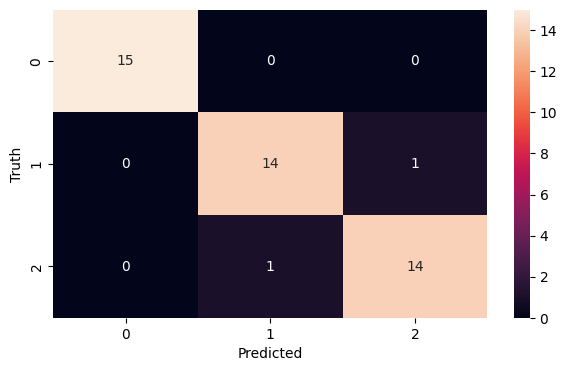

In [123]:
import seaborn as sn
plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')